#BeautifulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import csv
import glob
import openpyxl
def create_csv(letter):
    """ Create a CSV file for each stock price letter """
    try:
        soup = get_html('https://www.moneycontrol.com/india/stockpricequote/' + letter)
        time.sleep(5)

        links = soup.find_all('a', {'class': 'bl_12'})

        with open(letter + '.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            for link in links:
                writer.writerow([link.text, link['href']])
            csvfile.close()
        print("Success for ", letter)

    except Exception as e:
        print("Exception for ", letter, ": ", e)

In [ ]:
def print_csv_columns():
    """ Print the contents of all CSVs """
    for filename in glob.glob('*.csv'):
        with open(filename, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                if row[0]:
                    print(row[0], row[1])
                else:
                    continue

In [ ]:
def get_html(url):
    """ Get the HTML of a URL """
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    return soup

In [ ]:
def scrape_quick_links(url):
    """ Scrape quick links from a web page """
    soup = get_html(url)
    quick_links = soup.find('div', {'class': 'quick_links clearfix'})
    links = quick_links.find_all('a')

    for link in links:
        print("{} {}".format(link.text, link['href']))


In [ ]:
def get_active_href(url):
    """ Get the URL of the active page """
    soup = get_html(url)
    span_tag = soup.find('span', {'class': 'nextpaging'})
    parent_tag = span_tag.find_previous('a')
    if parent_tag:
        href = parent_tag.get('href')
        if href and href != 'javascript:void();':
            return href
    return None

In [ ]:
def scrape_table(url, stock_name, sheet_name, next_page = False):
    """ Scrape a table from a web page """
    soup = get_html(url)
    table = soup.find('table', {'class': 'mctable1'})
    rows = table.find_all('tr')

    if next_page:
        wb = openpyxl.load_workbook('{}.xlsx'.format(stock_name))
    else:
        wb = openpyxl.Workbook()
    sheet = wb.active
    sheet.title = sheet_name

    if next_page:
        first_empty_col = sheet.max_column - 2
        for i, row in enumerate(rows):
            for j, el in enumerate(row):
                if j > 2 and j < len(row) - 3:
                    cell_ref = sheet.cell(i + 1, first_empty_col + j + 1)
                    cell_ref.value = el.string
    else:
        for row in rows:
            row_list = [el.string for el in row][:-2]
            sheet.append(row_list)

    wb.save('{}.xlsx'.format(stock_name))

In [ ]:


def main():

    """ Get all the stock web links from A-Z available on
    moneycontrol and store them into
    csv files alphabetically """
    for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        create_csv(letter)

    """ Get contents from the generated csv files """
    print_csv_columns()

    """ Read a url for stock and scrape the urls of financial section
    like Balance Sheet, Profit and Loss and, Quarterly an Yearly results,
    Cashflow statments, etc. """
    url = "https://www.moneycontrol.com/india/stockpricequote/refineries/relianceindustries/RI"
    scrape_quick_links(url)

    """ Get the financial section data which we want. In this case Balance Sheet of the stock """
    url = "https://www.moneycontrol.com/financials/relianceindustries/balance-sheetVI/RI#RI"
    stock_name = "RELIANCE"
    sheet_name = "Balance Sheet"

    """ Store all the available data of all years including searching for previous years's data if available
    and saving them into a excel file with sheet Balance Sheet in this case """
    scrape_table(url, stock_name, sheet_name)

    first_entry = True
    while url:
        print(url)
        if first_entry:
            scrape_table(url, stock_name, sheet_name)
            first_entry = False
        else:
            scrape_table(url, stock_name, sheet_name, True)
        url = get_active_href(url)

if __name__ == '__main__':
    main()





Streaming output truncated to the last 5000 lines.
Shigan Quantum https://www.moneycontrol.com/india/stockpricequote/autoancillaries/shiganquantumtechnologies/SQT
Shikhar Consult https://www.moneycontrol.com/india/stockpricequote/financeinvestments/shikharconsultants/SC11
Shikhar Leasing https://www.moneycontrol.com/india/stockpricequote/financeinvestments/shikharleasingtrading/SLT
Shilchar Techno https://www.moneycontrol.com/india/stockpricequote/electricequipment/shilchartechnologies/ST21
Shilp Gravures https://www.moneycontrol.com/india/stockpricequote/miscellaneous/shilpgravures/SG05
Shilpa https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/shilpamedicare/SM19
Shilpax Lab https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/shilpaxlaboratories/SL05
Shilpi Cable https://www.moneycontrol.com/india/stockpricequote/cablestelephone/shilpicabletechnologies/SCT02
Shin-Ho-Petro https://www.moneycontrol.com/india/stockpricequote/petrochemicals/shinhopetrochemic

In [ ]:
import pandas as pd

df=pd.read_excel('RELIANCE.xlsx')
df

,\n,Unnamed: 1,\n.1,Mar 24,\n.2,Mar 23,\n.3,Mar 22,\n.4,Mar 21,...,\n.16,Mar 07,\n.17,Mar 06,\n.18,Mar 05,Unnamed: 43,Mar 04,\n.19,Unnamed: 46
0,\n,,\n,12 mths,\n,12 mths,\n,12 mths,\n,12 mths,...,\n,12 mths,\n,12 mths,\n,12 mths,NaN,12 mths,\n,12 mths
1,\n,EQUITIES AND LIABILITIES,\n,NaN,\n,NaN,\n,NaN,\n,NaN,...,\n,NaN,\n,NaN,\n,NaN,NaN,NaN,\n,NaN
2,\n,SHAREHOLDER'S FUNDS,\n,NaN,\n,NaN,\n,NaN,\n,NaN,...,\n,NaN,\n,NaN,\n,NaN,NaN,NaN,\n,NaN
3,\n,Equity Share Capital,\n,"6,766.00",\n,"6,766.00",\n,"6,765.00",\n,"6,445.00",...,\n,"1,393.21",\n,"1,393.17",\n,"1,393.09",NaN,"1,395.95",\n,"3,236.00"
4,\n,Total Share Capital,\n,"6,766.00",\n,"6,766.00",\n,"6,765.00",\n,"6,445.00",...,\n,"1,393.21",\n,"1,393.17",\n,"1,393.09",NaN,"1,395.95",\n,"3,236.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,\n,Non-Current Investments Quoted Market Value,\n,--,\n,"2,934.00",\n,"62,401.00",\n,"21,240.00",...,\n,"24,454.46",\n,780.71,\n,"4,156.40",NaN,948.40,\n,"16,950.00"
61,\n,Non-Current Investments Unquoted Book Value,\n,--,\n,"303,180.00",\n,"273,377.00",\n,"235,348.00",...,\n,"9,438.20",\n,"5,322.60",\n,"13,582.43",NaN,"13,435.29",\n,"45,920.00"
62,\n,CURRENT INVESTMENTS,\n,NaN,\n,NaN,\n,NaN,\n,NaN,...,\n,NaN,\n,NaN,\n,NaN,NaN,NaN,\n,NaN
63,\n,Current Investments Quoted Market Value,\n,--,\n,"65,984.00",\n,"21,471.00",\n,"36,303.00",...,\n,--,\n,--,\n,--,NaN,--,\n,"19,158.00"


In [ ]:
import pandas as pd
import numpy as np

# Read the Excel file
df = pd.read_excel('RELIANCE.xlsx')

# Remove columns containing '\n'
df_cleaned = df[df.columns[~df.columns.str.contains('\n')]]
df_cleaned

,Unnamed: 1,Mar 24,Mar 23,Mar 22,Mar 21,Mar 20,Unnamed: 13,Mar 19,Mar 18,Mar 17,...,Mar 10,Unnamed: 33,Mar 09,Mar 08,Mar 07,Mar 06,Mar 05,Unnamed: 43,Mar 04,Unnamed: 46
0,,12 mths,12 mths,12 mths,12 mths,12 mths,NaN,12 mths,12 mths,12 mths,...,12 mths,NaN,12 mths,12 mths,12 mths,12 mths,12 mths,NaN,12 mths,12 mths
1,EQUITIES AND LIABILITIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SHAREHOLDER'S FUNDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Equity Share Capital,"6,766.00","6,766.00","6,765.00","6,445.00","6,339.00",NaN,"6,339.00","6,335.00","3,251.00",...,"3,270.37",NaN,"1,573.53","1,453.39","1,393.21","1,393.17","1,393.09",NaN,"1,395.95","3,236.00"
4,Total Share Capital,"6,766.00","6,766.00","6,765.00","6,445.00","6,339.00",NaN,"6,339.00","6,335.00","3,251.00",...,"3,270.37",NaN,"1,573.53","1,453.39","1,393.21","1,393.17","1,393.09",NaN,"1,395.95","3,236.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Non-Current Investments Quoted Market Value,--,"2,934.00","62,401.00","21,240.00","27,475.00",NaN,"12,937.00","12,182.00","15,991.00",...,"8,248.22",NaN,"2,930.63","53,126.09","24,454.46",780.71,"4,156.40",NaN,948.40,"16,950.00"
61,Non-Current Investments Unquoted Book Value,--,"303,180.00","273,377.00","235,348.00","394,521.00",NaN,"259,314.00","160,045.00","124,851.00",...,"15,563.83",NaN,"18,927.65","12,746.75","9,438.20","5,322.60","13,582.43",NaN,"13,435.29","45,920.00"
62,CURRENT INVESTMENTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Current Investments Quoted Market Value,--,"65,984.00","21,471.00","36,303.00","31,814.00",NaN,"24,017.00","13,133.00","10,731.00",...,--,NaN,--,--,--,--,--,NaN,--,"19,158.00"


In [ ]:
import pandas as pd

# Assume df_cleaned contains your DataFrame with cleaned numeric values

# Replace 'Unnamed: 1' with a new name, such as 'Name'
df_cleaned.rename(columns={'Unnamed: 1': 'Name'}, inplace=True)

# Remove columns containing 'Unnamed'
df_cleaned = df_cleaned.loc[2:, ~df_cleaned.columns.str.contains('Unnamed')]

# Check if the 'Name' column exists before storing it
if 'Name' in df_cleaned.columns:
    # Store the 'Name' column in a separate variable
    name_column = df_cleaned['Name']
    # Drop the 'Name' column from the DataFrame
    df_cleaned.drop('Name', axis=1, inplace=True)
else:
    print("The 'Name' column does not exist in the DataFrame.")

# Convert all columns to numeric type
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')



# Replace NaN values with the mean of numeric columns
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Add the 'Name' column back to the DataFrame
df_cleaned['Name'] = name_column
# Display the cleaned DataFrame
print(df_cleaned)


    Mar 24   Mar 23   Mar 22  Mar 21  Mar 20   Mar 19  Mar 18  Mar 17  Mar 16  \
2     81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
3     81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
4     81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
5     81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
6     81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
..     ...      ...      ...     ...     ...      ...     ...     ...     ...   
60    81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
61    81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
62    81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
63    81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   
64    81.0  190.125  132.125  236.75     0.0  160.875  177.75     0.0  121.75   

        Mar 15  ...      Ma

<ipython-input-34-6e181fbfaa41>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={'Unnamed: 1': 'Name'}, inplace=True)


In [ ]:
df_cleaned

,Mar 24,Mar 23,Mar 22,Mar 21,Mar 20,Mar 19,Mar 18,Mar 17,Mar 16,Mar 15,...,Mar 12,Mar 11,Mar 10,Mar 09,Mar 08,Mar 07,Mar 06,Mar 05,Mar 04,Name
2,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,SHAREHOLDER'S FUNDS
3,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,Equity Share Capital
4,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,Total Share Capital
5,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,Reserves and Surplus
6,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,Total Reserves and Surplus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,780.710,145.56,948.400000,Non-Current Investments Quoted Market Value
61,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,Non-Current Investments Unquoted Book Value
62,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,CURRENT INVESTMENTS
63,81.0,190.125,132.125,236.75,0.0,160.875,177.75,0.0,121.75,155.333333,...,114.272727,102.636364,112.234615,89.86,119.485714,142.714,143.725,145.56,156.743529,Current Investments Quoted Market Value


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 2 to 64
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mar 24  63 non-null     float64
 1   Mar 23  63 non-null     float64
 2   Mar 22  63 non-null     float64
 3   Mar 21  63 non-null     float64
 4   Mar 20  63 non-null     float64
 5   Mar 19  63 non-null     float64
 6   Mar 18  63 non-null     float64
 7   Mar 17  63 non-null     float64
 8   Mar 16  63 non-null     float64
 9   Mar 15  63 non-null     float64
 10  Mar 14  63 non-null     float64
 11  Mar 13  63 non-null     float64
 12  Mar 12  63 non-null     float64
 13  Mar 11  63 non-null     float64
 14  Mar 10  63 non-null     float64
 15  Mar 09  63 non-null     float64
 16  Mar 08  63 non-null     float64
 17  Mar 07  63 non-null     float64
 18  Mar 06  63 non-null     float64
 19  Mar 05  63 non-null     float64
 20  Mar 04  63 non-null     float64
 21  Name    63 non-null     object 
dtypes: f

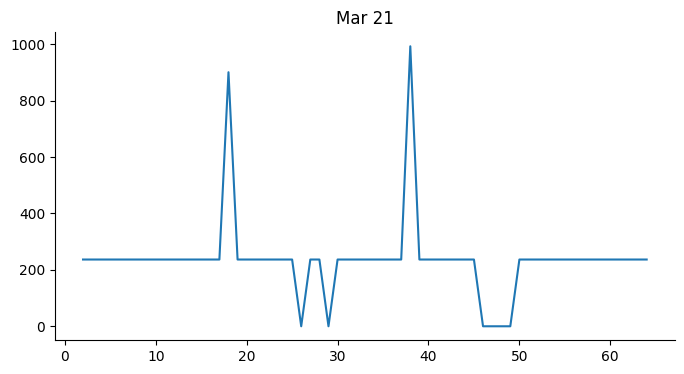

In [ ]:
from matplotlib import pyplot as plt
df_cleaned['Mar 21'].plot(kind='line', figsize=(8, 4), title='Mar 21')
plt.gca().spines[['top', 'right']].set_visible(False)

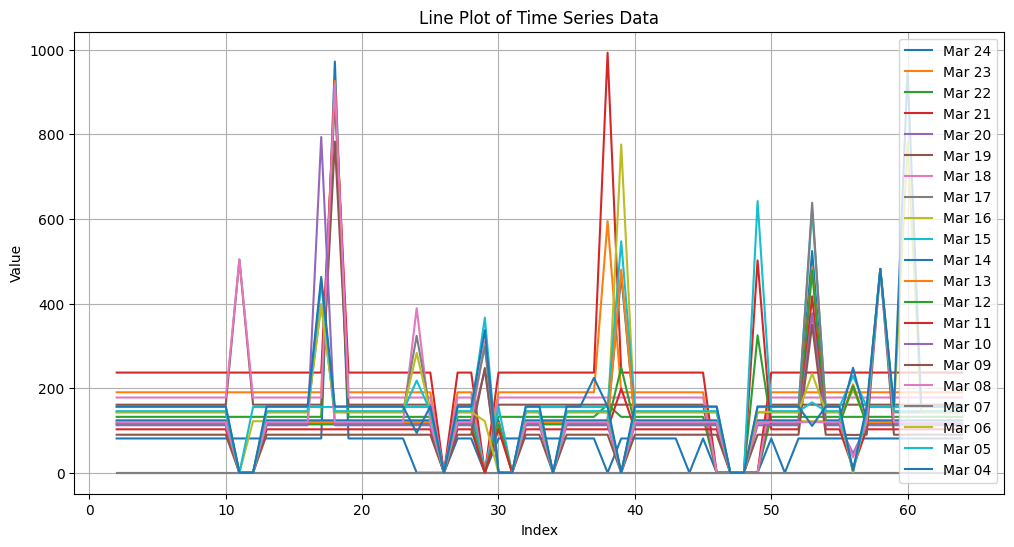

In [ ]:
import matplotlib.pyplot as plt

# Plotting a line chart for all columns except 'Name'
plt.figure(figsize=(12, 6))
for column in df_cleaned.columns[:-1]:
    plt.plot(df_cleaned[column], label=column)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


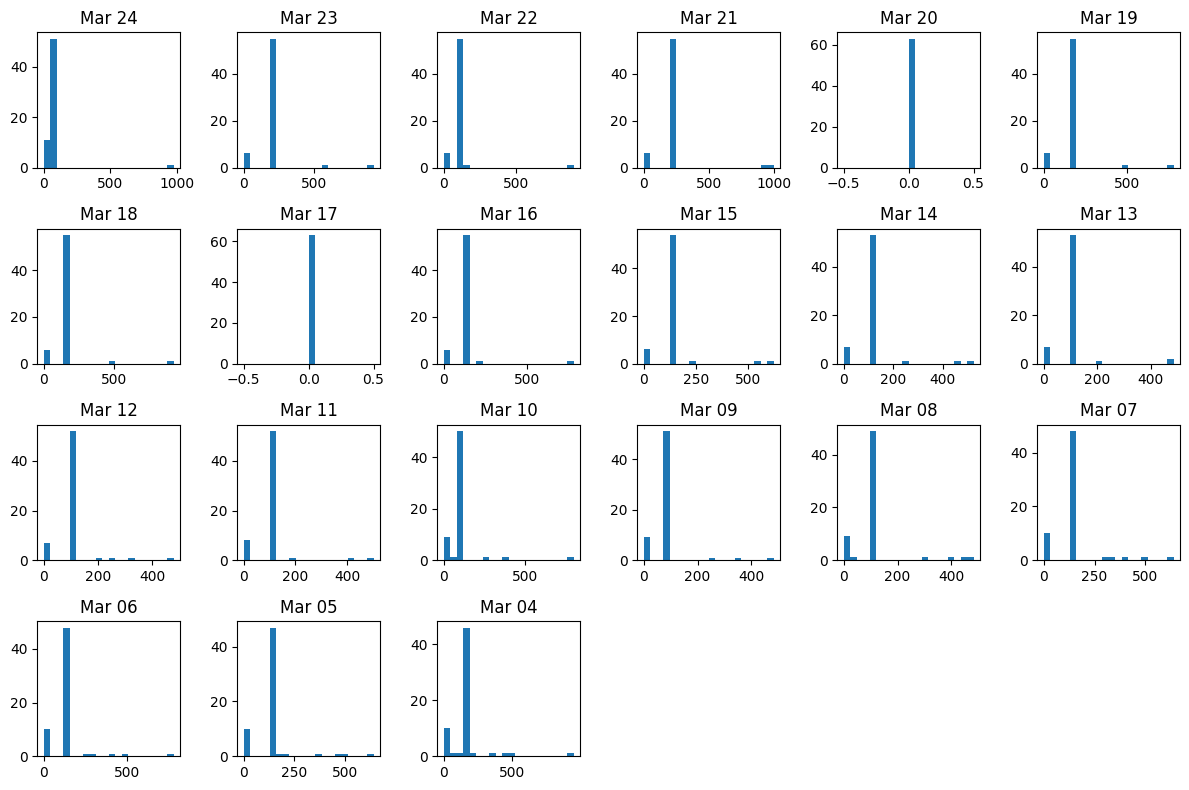

In [ ]:
# Plotting histograms for all columns except 'Name'
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_cleaned.columns[:-1], 1):
    plt.subplot(4, 6, i)
    plt.hist(df_cleaned[column], bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()


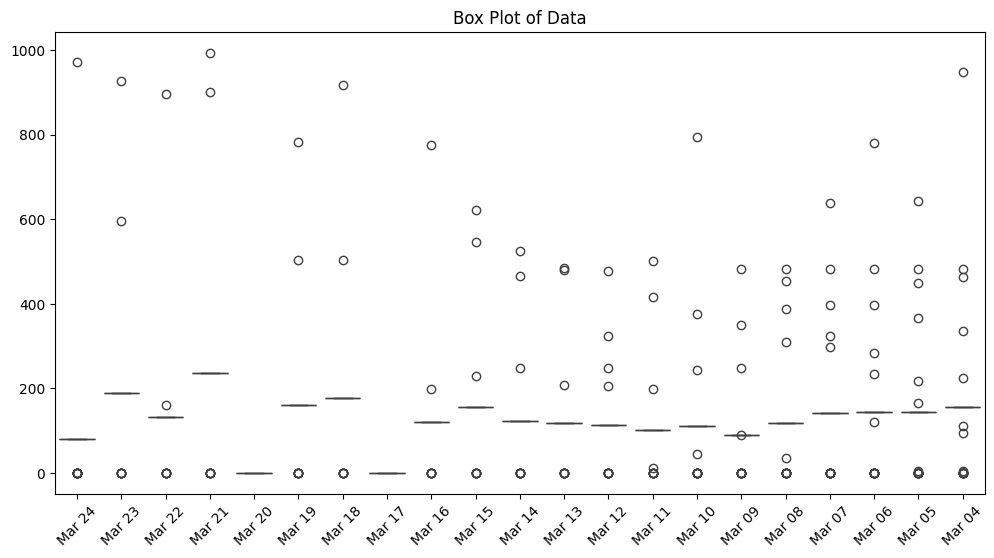

In [ ]:
import seaborn as sns

# Plotting box plots for all columns except 'Name'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned.drop('Name', axis=1))
plt.title('Box Plot of Data')
plt.xticks(rotation=45)
plt.show()



<Figure size 1000x800 with 0 Axes>

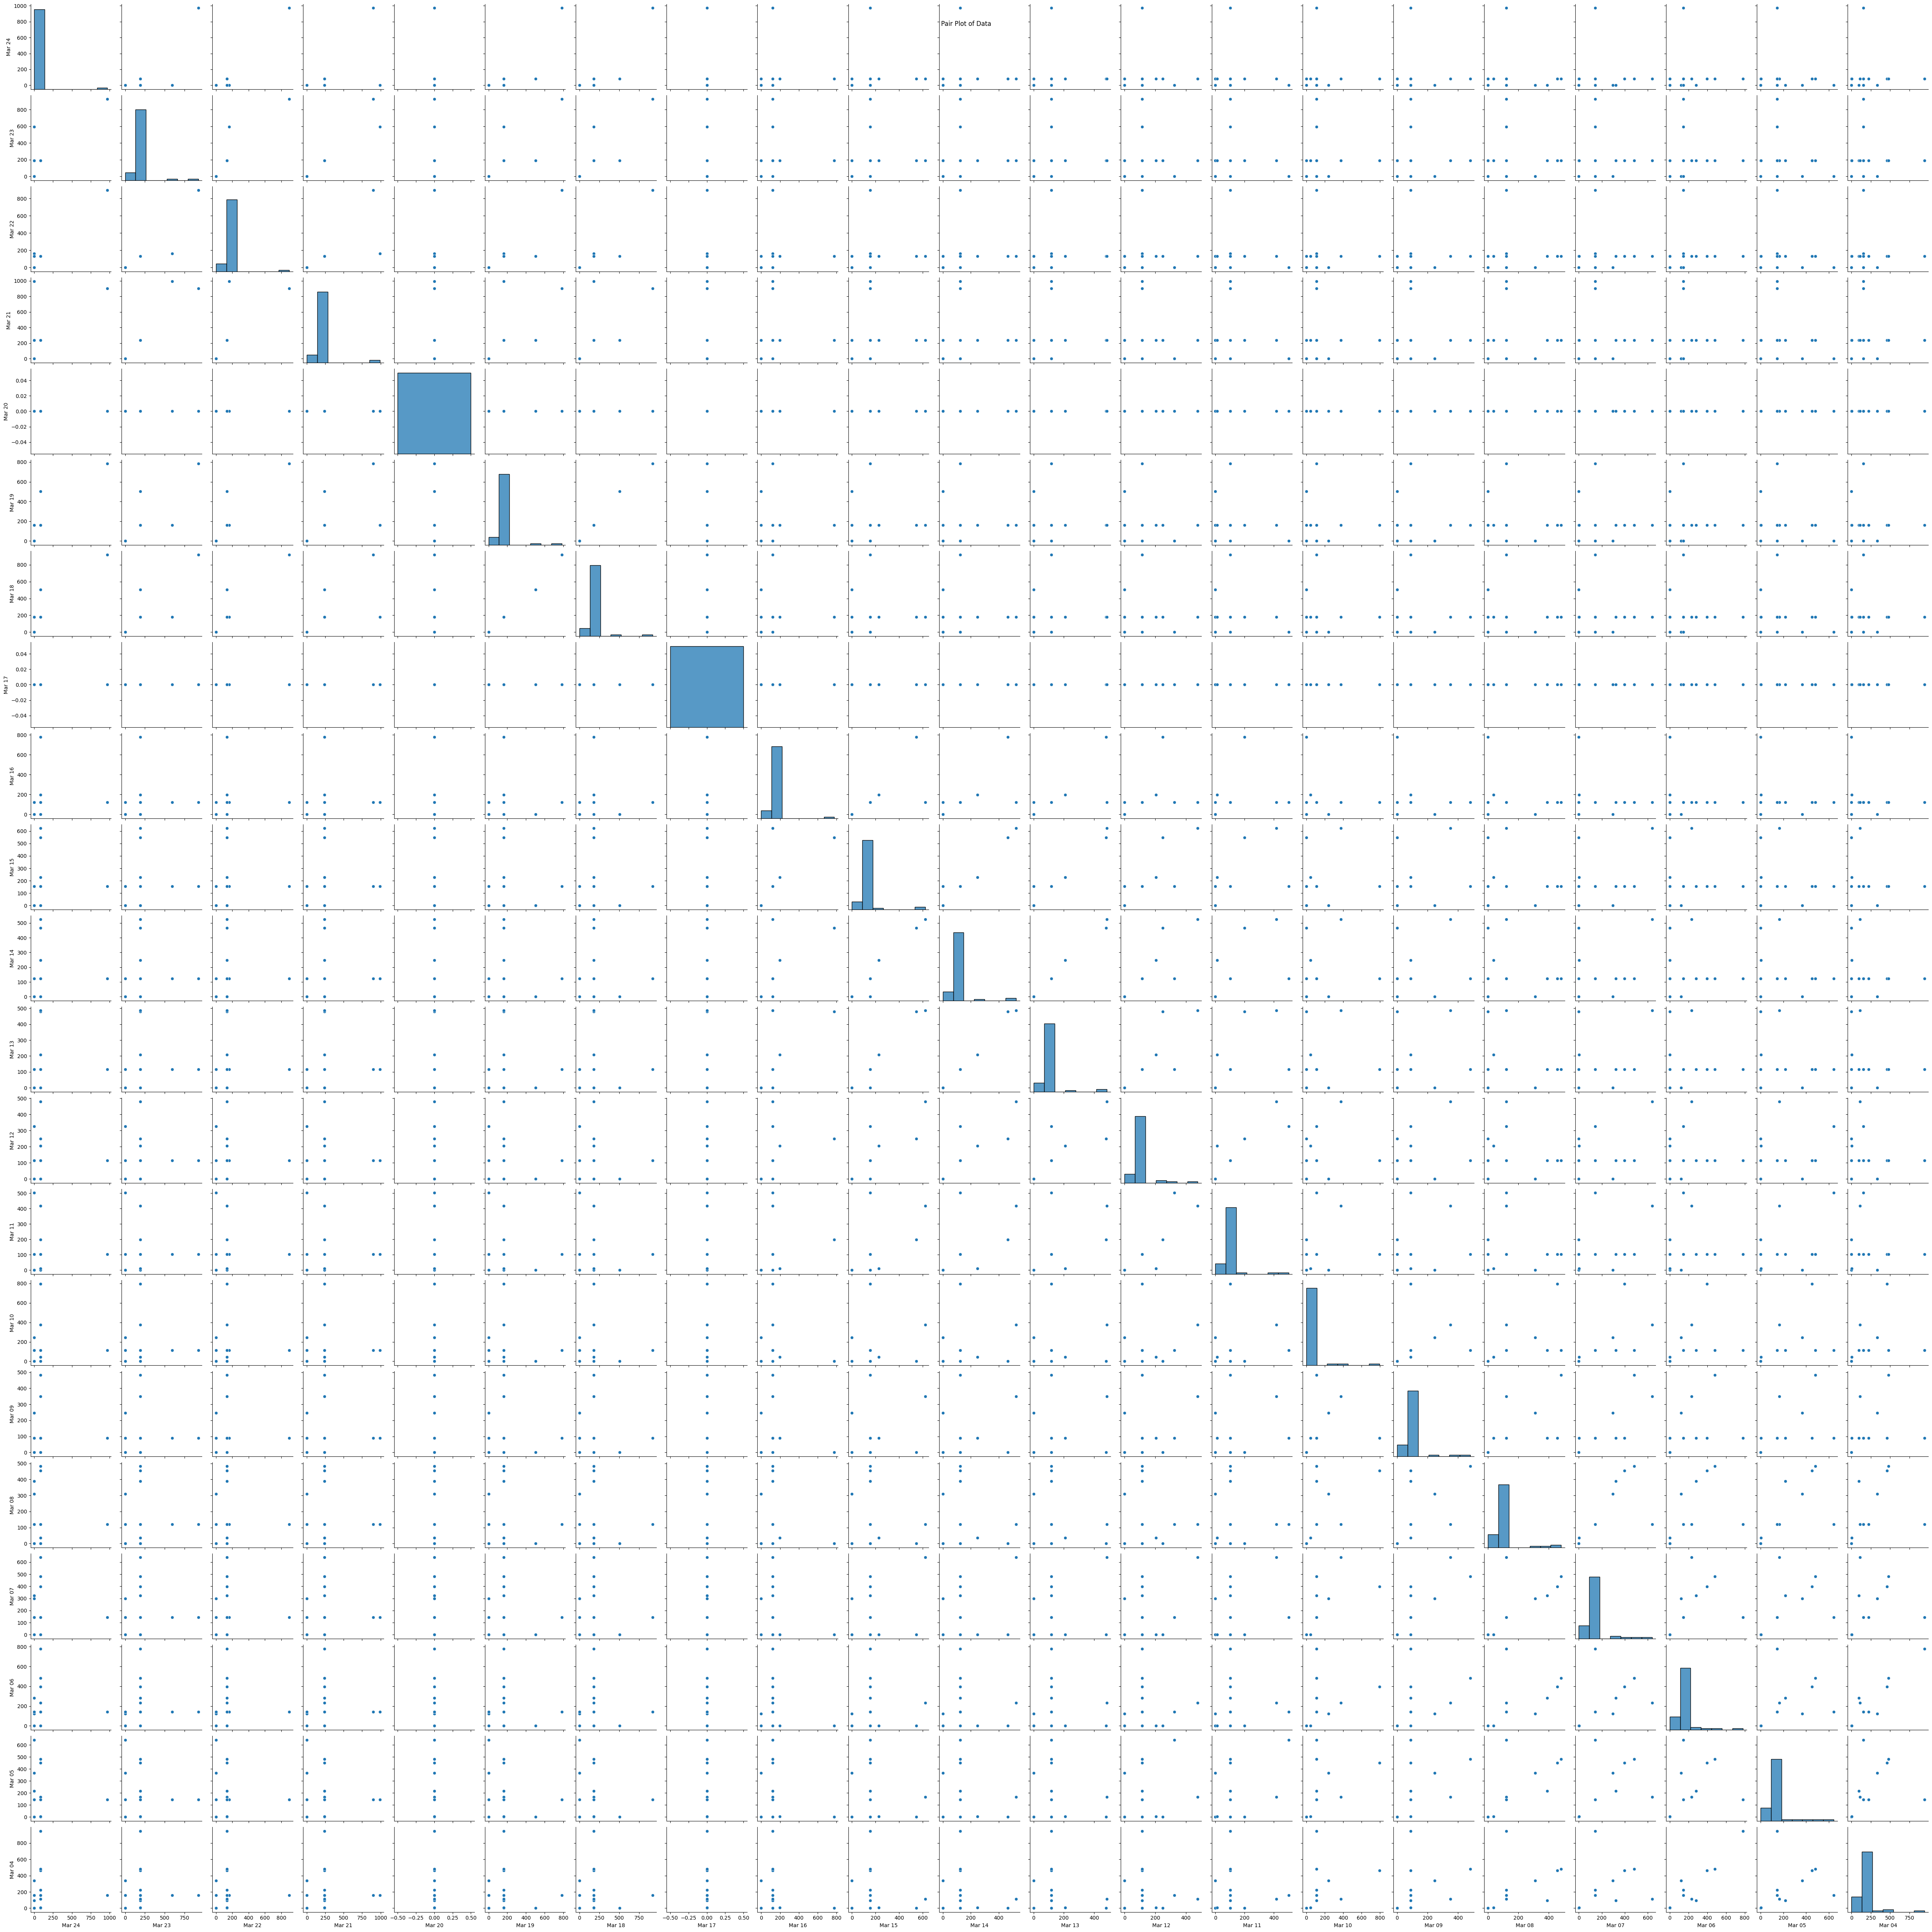

In [ ]:
# Plotting scatter plots for pairs of columns
plt.figure(figsize=(10, 8))
sns.pairplot(df_cleaned.drop('Name', axis=1))
plt.suptitle('Pair Plot of Data')
plt.show()


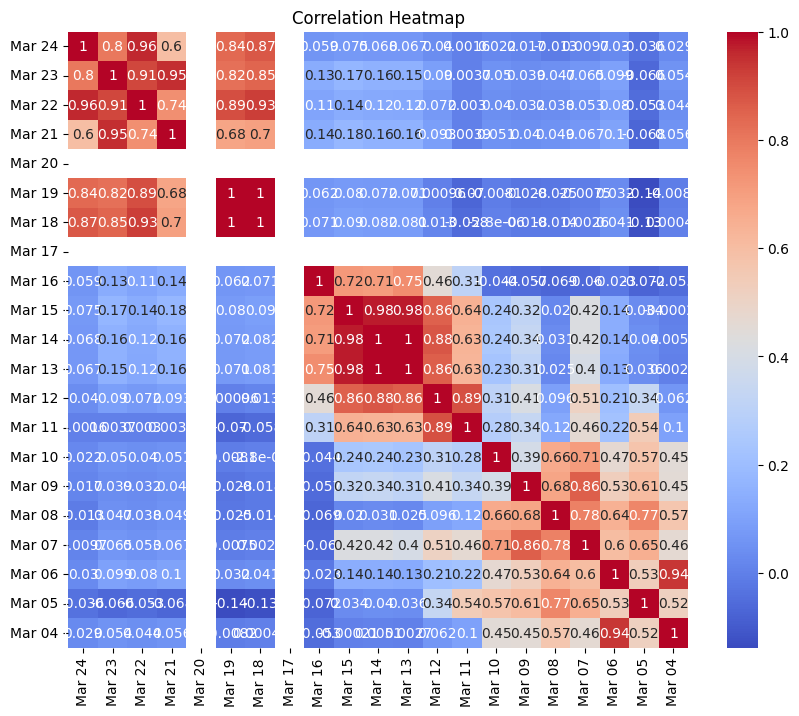

In [ ]:
# Plotting a heatmap of correlations between columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.drop('Name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


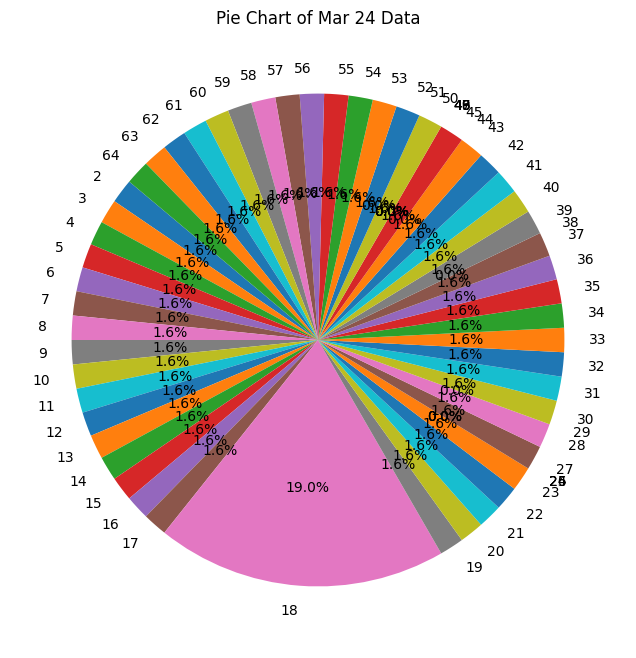

In [ ]:
# Plotting a pie chart for one of the columns
plt.figure(figsize=(8, 8))
plt.pie(df_cleaned['Mar 24'], labels=df_cleaned.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Mar 24 Data')
plt.show()


In [ ]:
df_cleaned.to_csv('balance_sheet_reliance_beautiful_soup.csv', index=False)

#LXML


In [ ]:
import requests
from lxml import html
import time
import csv
import glob
import openpyxl

def create_csv(letter):
    """ Create a CSV file for each stock price letter """
    try:
        response = requests.get('https://www.moneycontrol.com/india/stockpricequote/' + letter)
        tree = html.fromstring(response.content)
        time.sleep(5)

        links = tree.xpath('//a[@class="bl_12"]')

        with open(letter + '.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            for link in links:
                writer.writerow([link.text, link.get('href')])
            print("Success for ", letter)

    except Exception as e:
        print("Exception for ", letter, ": ", e)

In [ ]:
def print_csv_columns():
    """ Print the contents of all CSVs """
    for filename in glob.glob('*.csv'):
        with open(filename, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                if row[0]:
                    print(row[0], row[1])
                else:
                    continue

In [ ]:
def scrape_quick_links(url):
    """ Scrape quick links from a web page """
    response = requests.get(url)
    tree = html.fromstring(response.content)
    quick_links = tree.xpath('//div[@class="quick_links clearfix"]')[0]
    links = quick_links.xpath('.//a')

    for link in links:
        print("{} {}".format(link.text, link.get('href')))

In [ ]:

def get_active_href(url):
    """ Get the URL of the active page """
    response = requests.get(url)
    tree = html.fromstring(response.content)
    parent_tag = tree.xpath('//span[@class="nextpaging"]/preceding-sibling::a')
    if parent_tag:
        href = parent_tag[0].get('href')
        if href and href != 'javascript:void();':
            return href
    return None

In [ ]:

def scrape_table(url, stock_name, sheet_name, next_page=False):
    """ Scrape a table from a web page """
    response = requests.get(url)
    tree = html.fromstring(response.content)
    table = tree.xpath('//table[@class="mctable1"]')[0]
    rows = table.xpath('.//tr')

    if next_page:
        wb = openpyxl.load_workbook('{}.xlsx'.format(stock_name))
    else:
        wb = openpyxl.Workbook()
    sheet = wb.active
    sheet.title = sheet_name

    if next_page:
        first_empty_col = sheet.max_column - 2
        for i, row in enumerate(rows):
            for j, el in enumerate(row):
                if j > 2 and j < len(row) - 3:
                    cell_ref = sheet.cell(i + 1, first_empty_col + j + 1)
                    cell_ref.value = el.text_content()
    else:
        for row in rows:
            row_list = [el.text_content() for el in row][:-2]
            sheet.append(row_list)

    wb.save('{}.xlsx'.format(stock_name))

In [ ]:

def main():
    """ Get all the stock web links from A-Z available on
    moneycontrol and store them into
    csv files alphabetically """
    for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        create_csv(letter)

    """ Get contents from the generated csv files """
    print_csv_columns()

    """ Read a url for stock and scrape the urls of financial section
    like Balance Sheet, Profit and Loss and, Quarterly an Yearly results,
    Cashflow statments, etc. """
    url = "https://www.moneycontrol.com/india/stockpricequote/refineries/relianceindustries/RI"
    scrape_quick_links(url)

    """ Get the financial section data which we want. In this case Balance Sheet of the stock """
    url = "https://www.moneycontrol.com/financials/relianceindustries/balance-sheetVI/RI#RI"
    stock_name = "RELIANCE_lxml"
    sheet_name = "Balance Sheet"

    """ Store all the available data of all years including searching for previous years's data if available
    and saving them into a excel file with sheet Balance Sheet in this case """
    scrape_table(url, stock_name, sheet_name)

    first_entry = True
    while url:
        print(url)
        if first_entry:
            scrape_table(url, stock_name, sheet_name)
            first_entry = False
        else:
            scrape_table(url, stock_name, sheet_name, True)
        url = get_active_href(url)

if __name__ == '__main__':
    main()


Streaming output truncated to the last 5000 lines.
Shree Ganesh https://www.moneycontrol.com/india/stockpricequote/diamondcuttingjewellerypreciousmetals/shreeganeshjewelleryhousei/SGJ
Shree Ganesh https://www.moneycontrol.com/india/stockpricequote/textileshosieryknitwear/shreeganeshknit/SGK
Shree Ganesh Re https://www.moneycontrol.com/india/stockpricequote/miscellaneous/shreeganeshremedies/SGR
Shree Hanuman https://www.moneycontrol.com/india/stockpricequote/shreehanuman/shreehanumansugarindustries/SHS
Shree Hari Chem https://www.moneycontrol.com/india/stockpricequote/dyespigments/shreeharichemicalexports/SHC
Shree I-Jee Cem https://www.moneycontrol.com/india/stockpricequote/cementmini/shreeijeecementindustries/SIJ
Shree Ind https://www.moneycontrol.com/india/stockpricequote/paper/shreeindustries/SI19
Shree Jagdambe  https://www.moneycontrol.com/india/stockpricequote/paper/shreejagdambepapermills/SJP
Shree Karni Fab https://www.moneycontrol.com/india/stockpricequote/miscellaneous/shreek

In [ ]:
import pandas as pd
import numpy as np

# Read the Excel file
df = pd.read_excel('RELIANCE_lxml.xlsx')

# Remove columns containing '\n'
df_cleaned = df[df.columns[~df.columns.str.contains('\n')]]
df_cleaned

,Balance Sheet of Reliance Industries (in Rs. Cr.),Mar 24,Mar 23,Mar 22,Mar 21
0,,12 mths,12 mths,12 mths,12 mths
1,EQUITIES AND LIABILITIES,NaN,NaN,NaN,NaN
2,SHAREHOLDER'S FUNDS,NaN,NaN,NaN,NaN
3,Equity Share Capital,"6,766.00","6,766.00","6,765.00","6,445.00"
4,Total Share Capital,"6,766.00","6,766.00","6,765.00","6,445.00"
...,...,...,...,...,...
60,Non-Current Investments Quoted Market Value,--,"2,934.00","62,401.00","21,240.00"
61,Non-Current Investments Unquoted Book Value,--,"303,180.00","273,377.00","235,348.00"
62,CURRENT INVESTMENTS,NaN,NaN,NaN,NaN
63,Current Investments Quoted Market Value,--,"65,984.00","21,471.00","36,303.00"


In [ ]:
 # Store the 'Name' column in a separate variable
balance_column = df_cleaned['Balance Sheet of Reliance Industries (in Rs. Cr.)']
    # Drop the 'Name' column from the DataFrame
df_cleaned.drop('Balance Sheet of Reliance Industries (in Rs. Cr.)', axis=1, inplace=True)
# Convert all columns to numeric type
df_cleaned = df.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of each column
df_cleaned = df_cleaned.apply(lambda col: col.fillna(col.mean()), axis=0)
df_cleaned = df_cleaned.fillna(df_cleaned.mean())
df_cleaned['Balance Sheet of Reliance Industries (in Rs. Cr.)'] = balance_column
# Display the cleaned DataFrame
print(df_cleaned)

   Balance Sheet of Reliance Industries (in Rs. Cr.)  Mar 24   Mar 23  \
0                                                       81.0  190.125   
1                           EQUITIES AND LIABILITIES    81.0  190.125   
2                                SHAREHOLDER'S FUNDS    81.0  190.125   
3                               Equity Share Capital    81.0  190.125   
4                                Total Share Capital    81.0  190.125   
..                                               ...     ...      ...   
60       Non-Current Investments Quoted Market Value    81.0  190.125   
61       Non-Current Investments Unquoted Book Value    81.0  190.125   
62                               CURRENT INVESTMENTS    81.0  190.125   
63           Current Investments Quoted Market Value    81.0  190.125   
64           Current Investments Unquoted Book Value    81.0  190.125   

     Mar 22  Mar 21  
0   132.125  236.75  
1   132.125  236.75  
2   132.125  236.75  
3   132.125  236.75  
4   132.125  

In [ ]:
df_cleaned

,Balance Sheet of Reliance Industries (in Rs. Cr.),Mar 24,Mar 23,Mar 22,Mar 21
0,,81.0,190.125,132.125,236.75
1,EQUITIES AND LIABILITIES,81.0,190.125,132.125,236.75
2,SHAREHOLDER'S FUNDS,81.0,190.125,132.125,236.75
3,Equity Share Capital,81.0,190.125,132.125,236.75
4,Total Share Capital,81.0,190.125,132.125,236.75
...,...,...,...,...,...
60,Non-Current Investments Quoted Market Value,81.0,190.125,132.125,236.75
61,Non-Current Investments Unquoted Book Value,81.0,190.125,132.125,236.75
62,CURRENT INVESTMENTS,81.0,190.125,132.125,236.75
63,Current Investments Quoted Market Value,81.0,190.125,132.125,236.75


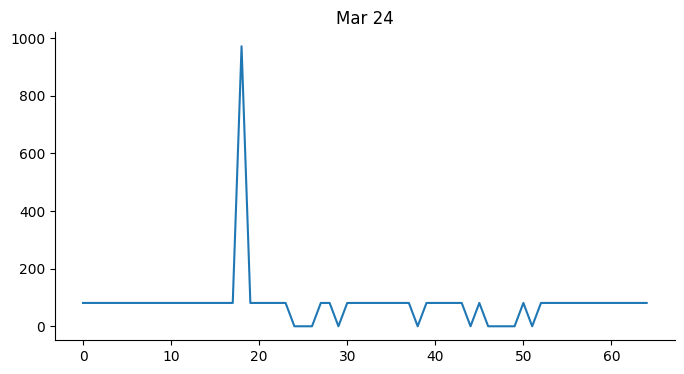

In [ ]:
from matplotlib import pyplot as plt
df_cleaned['Mar 24'].plot(kind='line', figsize=(8, 4), title='Mar 24')
plt.gca().spines[['top', 'right']].set_visible(False)

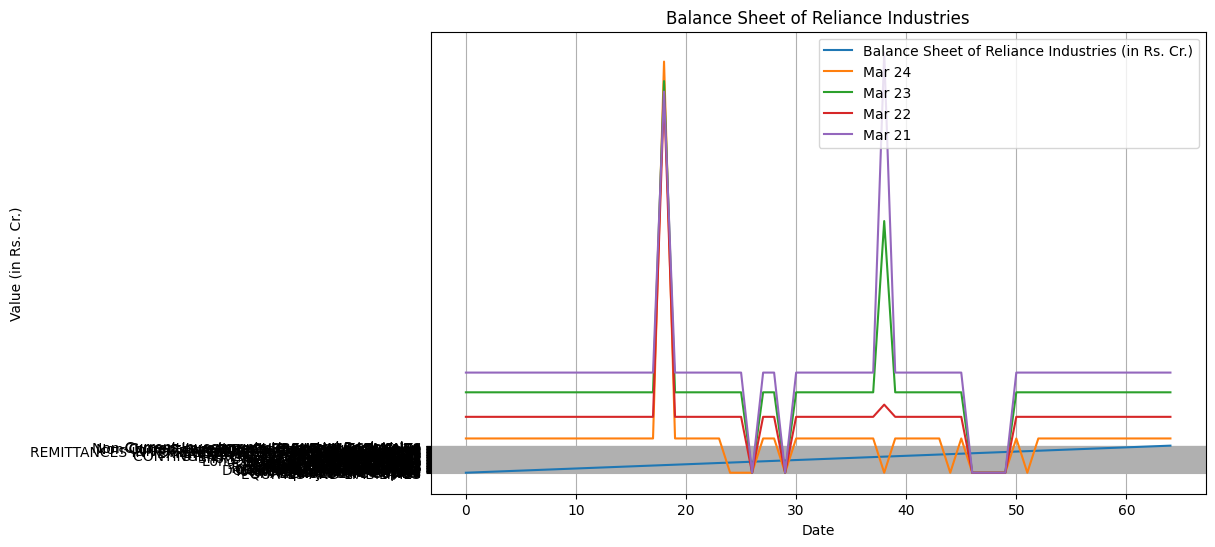

In [ ]:
# Plot the DataFrame
plt.figure(figsize=(10, 6))
for col in df_cleaned.columns:
    plt.plot(df_cleaned[col], label=col)

plt.xlabel('Date')
plt.ylabel('Value (in Rs. Cr.)')
plt.title('Balance Sheet of Reliance Industries')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df=df_cleaned

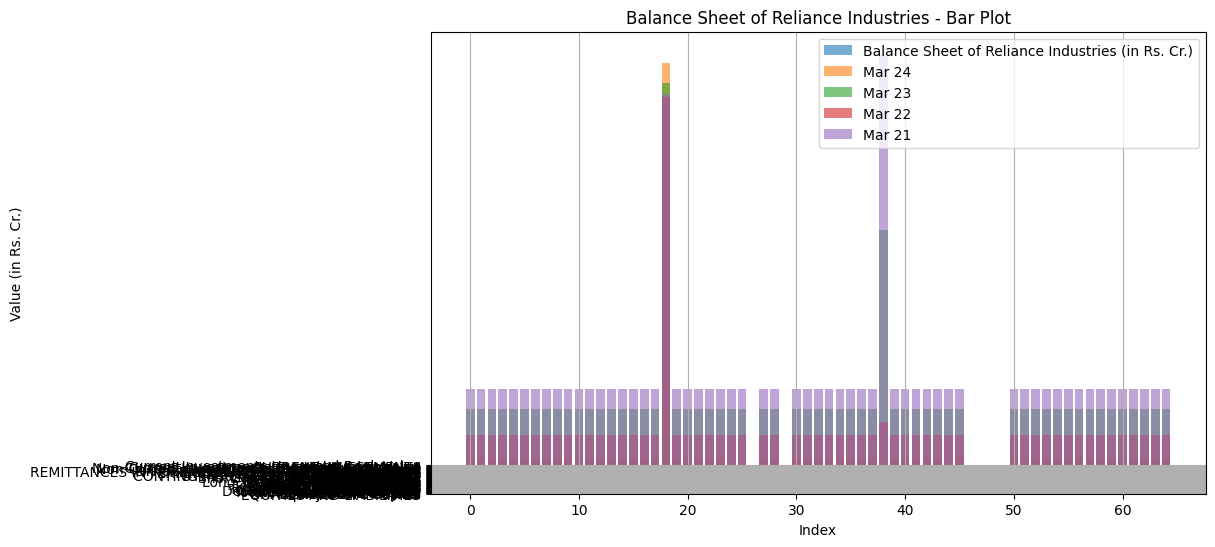

In [ ]:
# Plot bar plot for each column
plt.figure(figsize=(10, 6))
for col in df.columns:
    plt.bar(df.index, df[col], label=col, alpha=0.6)

plt.xlabel('Index')
plt.ylabel('Value (in Rs. Cr.)')
plt.title('Balance Sheet of Reliance Industries - Bar Plot')
plt.legend()
plt.grid(True)
plt.show()


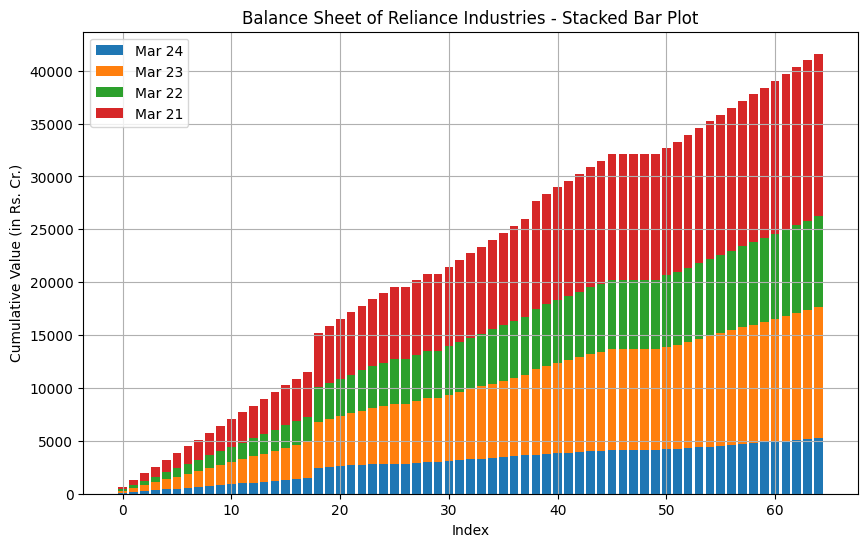

In [ ]:
# Plot stacked bar plot for cumulative values
cumulative_df = df.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(cumulative_df.index, cumulative_df['Mar 24'], label='Mar 24')
plt.bar(cumulative_df.index, cumulative_df['Mar 23'], bottom=cumulative_df['Mar 24'], label='Mar 23')
plt.bar(cumulative_df.index, cumulative_df['Mar 22'], bottom=cumulative_df['Mar 23']+cumulative_df['Mar 24'], label='Mar 22')
plt.bar(cumulative_df.index, cumulative_df['Mar 21'], bottom=cumulative_df['Mar 22']+cumulative_df['Mar 23']+cumulative_df['Mar 24'], label='Mar 21')

plt.xlabel('Index')
plt.ylabel('Cumulative Value (in Rs. Cr.)')
plt.title('Balance Sheet of Reliance Industries - Stacked Bar Plot')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df.to_csv('balance_sheet_reliance_lxml.csv', index=False)